In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import pylab as py 

from sklearn import linear_model
from sqlalchemy import create_engine
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

weather.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.


In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [7]:
weather.isnull().sum()

date                   0
summary                0
preciptype             0
temperature            0
apparenttemperature    0
humidity               0
windspeed              0
windbearing            0
visibility             0
loudcover              0
pressure               0
dailysummary           0
dtype: int64

In [8]:
weather.describe()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
count,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000,96453.000
mean,11.933,10.855,0.735,10.811,187.509,10.347,0.000,1003.236
std,9.552,10.697,0.195,6.914,107.383,4.192,0.000,116.970
min,-21.822,-27.717,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.689,2.311,0.600,5.828,116.000,8.340,0.000,1011.900
50%,12.000,12.000,0.780,9.966,180.000,10.046,0.000,1016.450
75%,18.839,18.839,0.890,14.136,290.000,14.812,0.000,1021.090
max,39.906,39.344,1.000,63.853,359.000,16.100,0.000,1046.380


In [9]:
# x = features
Y = weather[['temperature']]
# target variable
X = weather[['humidity', 'windspeed', 'windbearing', 'pressure']]

X_const = weather[['humidity', 'windspeed', 'windbearing', 'pressure']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [[-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]]

Intercept: 
 [37.92643819]


In [10]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Tue, 04 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:10:33   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Coefficients: 
 [2. 3.]

Intercept: 
 0.999999999650754


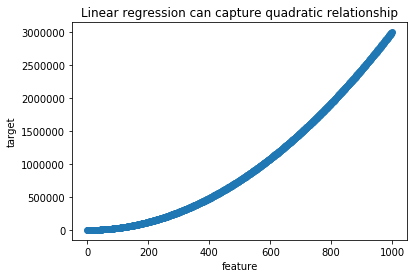

In [11]:

weather = pd.DataFrame()

# data from 0 to 999
weather["X"] = np.arange(0,1000,1)
# we take the square of X
weather["X_sq"] = weather["X"]**2

# this is our equation: Y = 1 + 2*X + 3*X^2
weather["Y"] = 1 + 2*weather["X"] + 3*weather["X_sq"]

# we fit a linear regression where target is Y
# and features are X and X^2
lrm_example = linear_model.LinearRegression()
lrm_example.fit(weather[["X","X_sq"]],weather["Y"])

# predictions of the linear regression
predictions = lrm_example.predict(weather[["X","X_sq"]])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(weather["X"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

In [12]:
X.head()

,const,humidity,windspeed,windbearing,pressure
0,1.000,0.890,14.120,251.000,1015.130
1,1.000,0.860,14.265,259.000,1015.630
2,1.000,0.890,3.928,204.000,1015.940
3,1.000,0.830,14.104,269.000,1016.410
4,1.000,0.830,11.045,259.000,1016.510


In [13]:
Y.head() # data frame covnvert y to array data type

,temperature
0,9.472
1,9.356
2,9.378
3,8.289
4,8.756


In [14]:
# Assumption two: the error term should be zero on average
predictions = lrm.predict(X_const)
errors = Y - predictions

print("Mean of the errors in the weather model is: {}".format(np.mean(errors)))

Mean of the errors in the weather model is: temperature   -0.000
dtype: float64


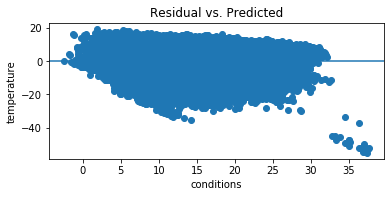

In [15]:
# Assumption three: homoscedasticity
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(predictions, errors)
plt.xlabel("conditions")
plt.ylabel("temperature")
plt.axhline(y=0)
plt.title("Residual vs. Predicted")
plt.show()

#plt.scatter(predictions, errors)
#plt.xlabel('conditions')
#plt.ylabel('temperature')
#plt.axhline(y=0)
#plt.title('Residual vs. Predicted')
#plt.show()

In [16]:
#Assumption four: low multicollinearity
vif = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
pd.DataFrame({"vif": vif[0:]}, index=X_const.columns).T

,humidity,windspeed,windbearing,pressure
vif,13.072,3.405,3.997,17.693


The above data shows that humidity and pressure has high multicolnearity. Windspeed and windbearing is below 5 which shows very little multicolnearity.

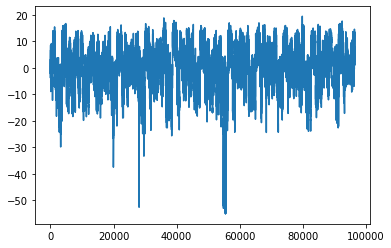

In [17]:
#Assumption five: error terms should be uncorrelated with one another
plt.plot(errors)
plt.show()

errors shows there is uncorrolation being displayed.

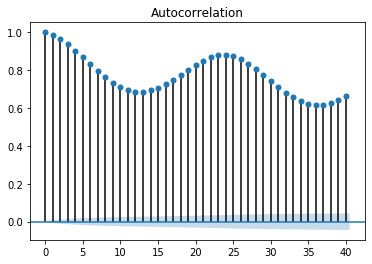

In [18]:
#No autocorrelation of risiduals
acf = smt.graphics.plot_acf(Y, lags=40 , alpha=0.05)
acf.show()

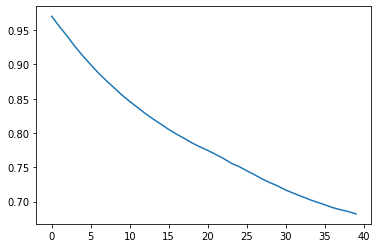

In [19]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

temperature shows from 95 drgrees to 68 degrees

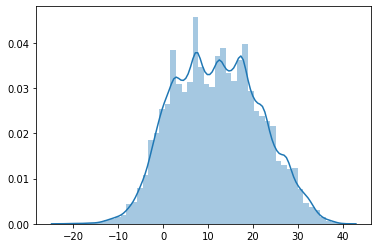

In [20]:
sns.distplot(Y)

distribution is normal distribution.

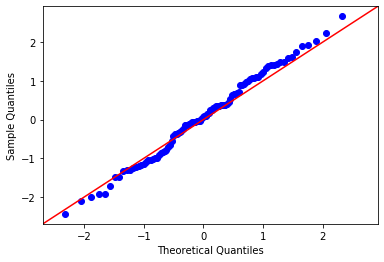

In [21]:
# Checking for normalty
#This plot provides a summary of whether the distributions of two variables are 
#similar or not with respect to the locations.

Y = np.random.normal(0, 1, 100)     
  
sm.qqplot(Y, line ='45') 
py.show() 

Majority of the data falls on the line.

In [24]:
np.mean(Y)

0.06551759493842703

In [25]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252367 and p value is 0.0
Normality test statistics is [3375.4323077] and p value is [0.]


In [ ]:
the P-values stats that our data is normally distributed.